In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Null Hypothesis: Budget does not impact average rating

In [3]:
# Pull in Budgets DF
budgets_pd_orig = pd.read_csv('data/budgets_pd.csv')

In [27]:
# Pull in Rotten Tomato DF
rt_pd_orig = pd.read_csv('data/rt_pd_all.csv')

In [5]:
budgets_pd_orig.tail()

,_id,date,title,budget,domestic_gross,worldwide_gross
6038,5f17b5918fbba2e9aaf4411d,Unknown,Red 11,"$7,000",$0,$0
6039,5f17b5918fbba2e9aaf4411e,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
6040,5f17b5918fbba2e9aaf4411f,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
6041,5f17b5918fbba2e9aaf44120,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
6042,5f17b5918fbba2e9aaf44121,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [6]:
# Clean budget, domestic, and worldwide series for new df
def form_budget_nums(series):
    '''
    Take in series from pd dataframe from budget and clear '$', ',' 
    and ascii characters that prevent from converting to int.
    Returns int64 series or list to be added to df
    '''
    temp = []
    for num in series:
        val = num.replace('$','').replace(',','').replace('\xa0','')
        temp.append(int(val))
#     return pd.Series(temp)
    return temp

# Clean and grab years used for link generation
def get_year(series):
    '''
    Take in date Series and clean to use for link generation on rt.
    Returns list of years in str form
    '''
    temp = []
    for date in series:
        try:
            val = date.replace(' ','').split(',')
            temp.append(val[1])
        except:
            temp.append(val[0])
    return temp
    
budgets = form_budget_nums(budgets_pd_orig['budget'])
domestics = form_budget_nums(budgets_pd_orig['domestic_gross'])
worldwides = form_budget_nums(budgets_pd_orig['worldwide_gross'])

years = get_year(budgets_pd_orig['date'])

In [7]:
budgets_pd = budgets_pd_orig[['title', 
                              'date']]
budgets_pd['budget'] = budgets
budgets_pd['domestic_gross'] = domestics
budgets_pd['worldwide_gross'] = worldwides


/Users/Michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/Michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [8]:
budgets_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6043 entries, 0 to 6042
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            6043 non-null   object
 1   date             6043 non-null   object
 2   budget           6043 non-null   int64 
 3   domestic_gross   6043 non-null   int64 
 4   worldwide_gross  6043 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 236.2+ KB


In [28]:
rt_pd_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3628 entries, 0 to 3627
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   _id                   3628 non-null   object
 1   title                 3628 non-null   object
 2   rotten_tomato_rating  3628 non-null   object
 3   audience_rating       3628 non-null   object
 4   director              3628 non-null   object
 5   writers               3628 non-null   object
 6   top_5_billed          3628 non-null   object
dtypes: object(7)
memory usage: 198.5+ KB


In [29]:
# Clean rt rating and audience rating series for new df
def form_rt_nums(series):
    '''
    Take in series from pd dataframe from budget and clear '%' 
    Returns int64 series or list to be added to df
    '''
    temp = []
    for num in series:
        val = num.replace('%','')
        temp.append(int(val))
    return temp
    
rt_ratings = form_rt_nums(rt_pd_orig['rotten_tomato_rating'])
aud_ratings = form_rt_nums(rt_pd_orig['audience_rating'])

In [30]:
rt_pd = rt_pd_orig[['title', 'director', 'writers', 'top_5_billed']]
rt_pd['rotten_tomato_rating'] = rt_ratings
rt_pd['audience_rating'] = aud_ratings

/Users/Michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
rt_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3628 entries, 0 to 3627
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   title                 3628 non-null   object
 1   director              3628 non-null   object
 2   writers               3628 non-null   object
 3   top_5_billed          3628 non-null   object
 4   rotten_tomato_rating  3628 non-null   int64 
 5   audience_rating       3628 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 170.2+ KB


In [32]:
merged= pd.merge(rt_pd, budgets_pd, on='title')

In [33]:
merged_pd = merged[['title', 
                    'date', 
                    'rotten_tomato_rating', 
                    'audience_rating', 
                    'budget', 
                    'domestic_gross', 
                    'worldwide_gross', 
                    'director', 
                    'writers', 
                    'top_5_billed']]
# merged_pd.dropna('director')

In [194]:
merged_pd.head(5)

,title,date,rotten_tomato_rating,audience_rating,budget,domestic_gross,worldwide_gross,director,writers,top_5_billed
0,Avengers: Endgame,"Apr 23, 2019",94,90,400000000,858373000,2797800564,['Anthony Russo'],"['Christopher Markus', ' Stephen McFeely']","['Robert Downey Jr. ', 'Mark Ruffalo ', 'Scarl..."
1,Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",33,54,379000000,241063875,1045663875,"['Dariusz Wolski', ' Rob Marshall']","['Rob Marshall', ' Terry Rossio', ' Ted Elliott']","['Johnny Depp ', 'Penelope Cruz ', 'Ian McShan..."
2,Avengers: Age of Ultron,"Apr 22, 2015",76,83,365000000,459005868,1396099202,['Joss Whedon'],"['Stan Lee', ' Jack Kirby', ' Joss Whedon']","['Robert Downey Jr. ', 'Chris Evans ', 'Mark R..."
3,Avengers: Infinity War,"Apr 25, 2018",85,91,300000000,678815482,2048359754,['Anthony Russo'],"['Christopher Markus', ' Stephen McFeely']","['Robert Downey Jr. ', 'Chris Hemsworth ', 'Ma..."
4,Star Wars: The Rise of Skywalker,"Dec 18, 2019",51,86,275000000,515202542,1073469600,['J.J. Abrams'],"['J.J. Abrams', ' Chris Terrio']","['Carrie Fisher ', 'Mark Hamill ', 'Adam Drive..."


In [35]:
merged_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3701 entries, 0 to 3700
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   title                 3701 non-null   object
 1   date                  3701 non-null   object
 2   rotten_tomato_rating  3701 non-null   int64 
 3   audience_rating       3701 non-null   int64 
 4   budget                3701 non-null   int64 
 5   domestic_gross        3701 non-null   int64 
 6   worldwide_gross       3701 non-null   int64 
 7   director              3701 non-null   object
 8   writers               3701 non-null   object
 9   top_5_billed          3701 non-null   object
dtypes: int64(5), object(5)
memory usage: 318.1+ KB


In [37]:
merged_pd['title'].nunique()

3597

In [40]:
m = merged_pd.drop_duplicates('title')

In [41]:
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3597 entries, 0 to 3700
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   title                 3597 non-null   object
 1   date                  3597 non-null   object
 2   rotten_tomato_rating  3597 non-null   int64 
 3   audience_rating       3597 non-null   int64 
 4   budget                3597 non-null   int64 
 5   domestic_gross        3597 non-null   int64 
 6   worldwide_gross       3597 non-null   int64 
 7   director              3597 non-null   object
 8   writers               3597 non-null   object
 9   top_5_billed          3597 non-null   object
dtypes: int64(5), object(5)
memory usage: 309.1+ KB


In [42]:
# Split Data into top 10% budgets and bottom 10% budgets
perc = int(0.1 * len(m.budget))
rta_series = m['rotten_tomato_rating'][:perc]
rtb_series = m['rotten_tomato_rating'][-perc:]

auda_series = m['audience_rating'][:perc]
audb_series = m['audience_rating'][-perc:]

In [43]:
print(audb_series)

3342    44
3343    62
3344    74
3345    74
3346    94
        ..
3696    53
3697    76
3698    79
3699    85
3700    57
Name: audience_rating, Length: 359, dtype: int64


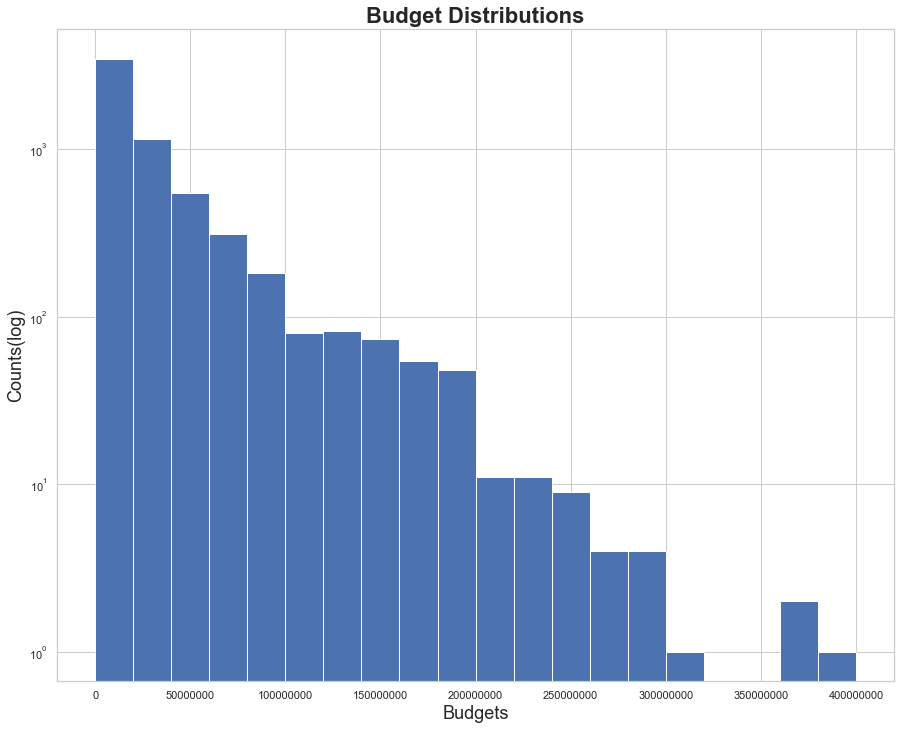

In [193]:
# Histogram of Budgets
# sns.distplot(budgets_pd['budget'], kde = False)
# sns.set(xticks=)
# budgets_pd['budget'].hist(bins = 100)
x_tix = range(0,450000000,50000000)
# print(x_tix)
fig, ax = plt.subplots(figsize =(15,12))
ax.hist(budgets_pd['budget'], 20)
ax.set_xticks(x_tix)
ax.set_yscale('log')
ax.set_xlabel('Budgets', fontsize=18)
ax.set_ylabel('Counts(log)', fontsize=18)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.set_title('Budget Distributions', fontweight="bold", size=22)


plt.show()

NameError: name 'a_series' is not defined

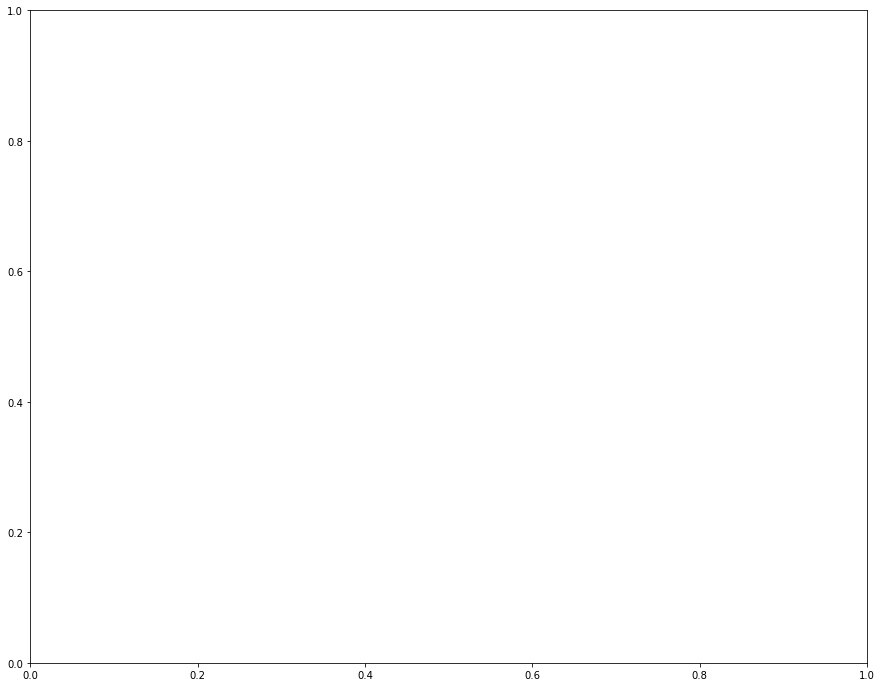

In [45]:
# Histogram of Budgets
# sns.distplot(budgets_pd['budget'], kde = False)
# sns.set(xticks=)
# budgets_pd['budget'].hist(bins = 100)
x_tix = range(0,450000000,50000000)
# print(x_tix)
fig, ax = plt.subplots(figsize =(15,12))
ax.hist(a_series, 50)
ax.set_xticks(x_tix)
ax.set_yscale('log')
ax.set_xlabel('Budgets', fontsize=18)
ax.set_ylabel('Counts(log)', fontsize=18)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

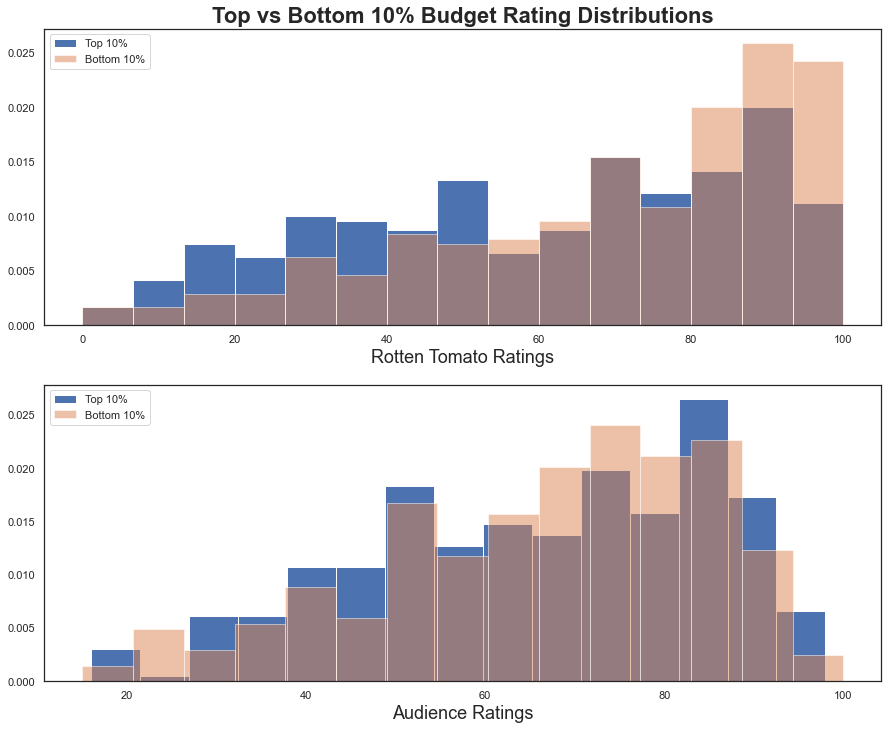

In [187]:
# Histogram of normalized top 10% budget ratings vs bottom 10%

# ADJUST BIN WIDTHS, USE DENSITY FOR Y INSTEAD OF COUNTS
fig, axs = plt.subplots(2, 1, figsize =(15,12))

labels = ["Top 10%", "Bottom 10%"]

axs[0].hist(rta_series, 15, label=labels[0], density = True)
axs[0].hist(rtb_series, 15, label=labels[1], density = True, alpha = 0.5)
axs[0].legend(loc="upper left")
axs[0].set_xlabel('Rotten Tomato Ratings', fontsize=18)
axs[0].set_title('Top vs Bottom 10% Budget Rating Distributions', fontweight="bold", size=22)

axs[1].hist(auda_series, 15, label=labels[0], density = True)
axs[1].hist(audb_series, 15, label=labels[1], density = True, alpha = 0.5)
axs[1].legend(loc="upper left")
axs[1].set_xlabel('Audience Ratings', fontsize=18)
# axs.set_ylabel('Counts', fontsize=18)
plt.show()

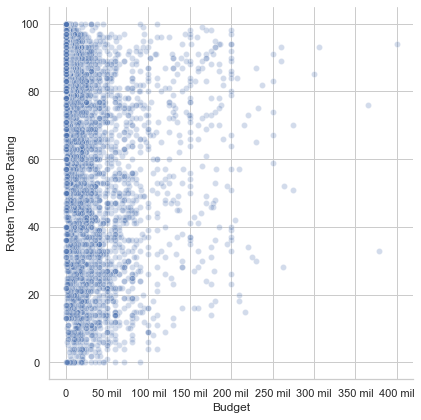

In [192]:
# Seaborn for scatter of Rotten Tomato Ratings vs Budget of Movie
sns.set(style="whitegrid")
# fig1, ax1 = plt.subplots(figsize =(15,12))
# Load the example mpg dataset
# bvr = sns.load_dataset("m")
# Plot miles per gallon against horsepower with other semantics
splot = sns.relplot(x="budget", y="rotten_tomato_rating",
            sizes=(40, 400), alpha=.25, palette="muted",
            height=6, data=m, ax=ax1)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
x_tix = range(0,450000000,50000000)
x_tixlabels = ['0','50 mil', '100 mil', '150 mil', '200 mil', '250 mil', '300 mil', '350 mil', '400 mil']
splot.set(xlabel="Budget", ylabel="Rotten Tomato Rating", xticks=x_tix, xticklabels=x_tixlabels)
# splot.set(xscale="log")

# xlabels = ['{:,.2f}'.format(x) + 'K' for x in splot.get_xticks()/1000]
# splot.set_xticklabels(xlabels)


# ADD hue="oscar" or director writers etc if able to add this data to color
# the points

# Seaborn example scatter
# sns.relplot(x="budget", y="rotten_tomato_rating", hue="origin", size="weight",
#             sizes=(40, 400), alpha=.5, palette="muted",
#             height=6, data=m)

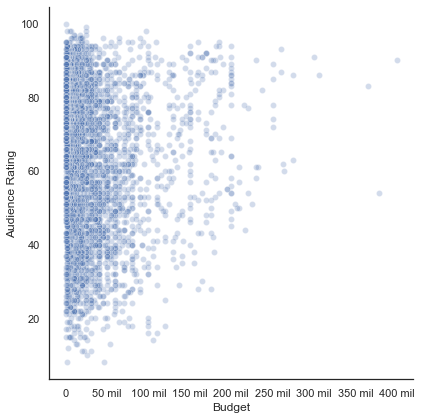

In [51]:
# Seaborn for scatter of Audience Rating vs Budget of Movie
sns.set(style="white")

splot = sns.relplot(x="budget", y="audience_rating",
            sizes=(40, 400), alpha=.25, palette="muted",
            height=6, data=m, ax=ax1)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
x_tix = range(0,450000000,50000000)
x_tixlabels = ['0','50 mil', '100 mil', '150 mil', '200 mil', '250 mil', '300 mil', '350 mil', '400 mil']
splot.set(xlabel="Budget", ylabel="Audience Rating", xticks=x_tix, xticklabels= x_tixlabels)

In [ ]:
# Shapiro test to see if sample is from something with normal dist.

# scipy.stats.shapiro(x, a=None, reta=False)[source]
# Test statistic, p-value
# x = array of your data
# scipy.stats.normaltest

rta_p = stats.shapiro(rta_series)
rtb_p = stats.shapiro(rtb_series)
auda_p = stats.shapiro(auda_series)
audb_p = stats.shapiro(audb_series)

print(rta_p, rtb_p, auda_p, audb_p)

In [52]:
# T-Test

# Ex.
# def calculate_t_test(sample1, sample2, type_I_error_rate):
#     ttest = stats.ttest_ind(sample1, sample2, equal_var = False)
#     return (ttest[1], ttest[1] < type_I_error_rate)
# error = .05
# print(calculate_t_test(sub_12_list[0], sub_12_list[1], error))

_, rt_p_val = stats.ttest_ind(rta_series, rtb_series, nan_policy='omit')
_, aud_p_val = stats.ttest_ind(auda_series, audb_series, nan_policy='omit')

In [53]:
print(rt_p_val)
print(aud_p_val)

1.0455998278289832e-07
0.8142235402803842


In [ ]:
# plot rt vs audience and color based on budget
splot = sns.relplot(x="budget", y="audience_rating",
            sizes=(40, 400), alpha=.25, palette="muted",
            height=6, data=m, ax=ax1)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
x_tix = range(0,450000000,50000000)
x_tixlabels = ['0','50 mil', '100 mil', '150 mil', '200 mil', '250 mil', '300 mil', '350 mil', '400 mil']
splot.set(xlabel="Budget", ylabel="Audience Rating", xticks=x_tix, xticklabels= x_tixlabels)

In [55]:
oscars_db_orig = pd.read_csv('data/academy_data.csv')

In [56]:
oscars_db_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11058 entries, 0 to 11057
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      11058 non-null  int64 
 1   category  11058 non-null  object
 2   winner    11058 non-null  bool  
 3   entity    11058 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 270.1+ KB


In [57]:
oscars_db_orig.head(5)

,year,category,winner,entity
0,1927,ACTOR,False,Richard Barthelmess
1,1927,ACTOR,True,Emil Jannings
2,1927,ACTRESS,False,Louise Dresser
3,1927,ACTRESS,True,Janet Gaynor
4,1927,ACTRESS,False,Gloria Swanson


In [58]:
oscars_db_orig.category.unique()

array(['ACTOR', 'ACTRESS', 'ART DIRECTION', 'CINEMATOGRAPHY',
       'DIRECTING (Comedy Picture)', 'DIRECTING (Dramatic Picture)',
       'ENGINEERING EFFECTS', 'OUTSTANDING PICTURE',
       'UNIQUE AND ARTISTIC PICTURE', 'WRITING (Adaptation)',
       'WRITING (Original Story)', 'WRITING (Title Writing)',
       'SPECIAL AWARD', 'DIRECTING', 'WRITING', 'OUTSTANDING PRODUCTION',
       'SOUND RECORDING', 'SCIENTIFIC OR TECHNICAL AWARD (Class I)',
       'SCIENTIFIC OR TECHNICAL AWARD (Class II)',
       'SCIENTIFIC OR TECHNICAL AWARD (Class III)',
       'SHORT SUBJECT (Cartoon)', 'SHORT SUBJECT (Comedy)',
       'SHORT SUBJECT (Novelty)', 'ASSISTANT DIRECTOR', 'FILM EDITING',
       'MUSIC (Scoring)', 'MUSIC (Song)', 'DANCE DIRECTION',
       'WRITING (Screenplay)', 'ACTOR IN A SUPPORTING ROLE',
       'ACTRESS IN A SUPPORTING ROLE', 'SHORT SUBJECT (Color)',
       'SHORT SUBJECT (One-reel)', 'SHORT SUBJECT (Two-reel)',
       'IRVING G. THALBERG MEMORIAL AWARD', 'MUSIC (Original Scor

In [88]:
m.head(1)

,title,date,rotten_tomato_rating,audience_rating,budget,domestic_gross,worldwide_gross,director,writers,top_5_billed
0,Avengers: Endgame,"Apr 23, 2019",94,90,400000000,858373000,2797800564,['Anthony Russo'],"['Christopher Markus', ' Stephen McFeely']","['Robert Downey Jr. ', 'Mark Ruffalo ', 'Scarl..."


In [75]:
print(m.writers[0])
test = m.writers[0].split(',')
print(test)

test_lis = []
for item in test:
    clean = item.replace("'", '').replace('[','').replace(']', '').replace(' ','')
    test_lis.append(clean)
    
print(test_lis)
print(test_lis[0])
print(type(test_lis[0]))
    


['Christopher Markus', ' Stephen McFeely']
["['Christopher Markus'", " ' Stephen McFeely']"]
['ChristopherMarkus', 'StephenMcFeely']
ChristopherMarkus
<class 'str'>


In [104]:
def column_cleaner(series):
    cleaned = []
    for row in series:
        row = row.split(',')
        temp_lis = []
        for item in row:
            temp = item.replace("'", '').replace('[','').replace(']', '')
            temp = temp.strip()
            temp_lis.append(temp)
        cleaned.append(temp_lis)
    return cleaned
    
# test = column_cleaner(m.writers)
# print(test[0])

In [105]:
writers = column_cleaner(m.writers)
directors = column_cleaner(m.director)
top_cast = column_cleaner(m.top_5_billed)

In [106]:
oscars_pd = m[['title', 'rotten_tomato_rating', 'audience_rating', 'budget']]

In [107]:
oscars_pd.head(1)

,title,rotten_tomato_rating,audience_rating,budget
0,Avengers: Endgame,94,90,400000000


In [108]:
oscars_pd['directors'] = directors
oscars_pd['writers'] = writers
oscars_pd['top_cast'] = top_cast

/Users/Michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [109]:
oscars_pd.head(1)

,title,rotten_tomato_rating,audience_rating,budget,directors,writers,top_cast
0,Avengers: Endgame,94,90,400000000,[Anthony Russo],"[Christopher Markus, Stephen McFeely]","[Robert Downey Jr., Mark Ruffalo, Scarlett Joh..."


In [121]:
print(oscars_pd.top_cast[0][0])
print(type(oscars_pd.top_cast[0][0]))
print(oscars_pd.top_cast[0][0] in oscars_db_orig.entity.values)

Robert Downey Jr.
<class 'str'>
True


In [117]:
print(oscars_db_orig.entity[9692])
print(type(oscars_db_orig.entity[9692]))

Robert Downey Jr.
<class 'str'>


In [113]:
print(oscars_db_orig.entity.str.contains(oscars_pd.top_cast[0][0]))

0        False
1        False
2        False
3        False
4        False
         ...  
11053    False
11054    False
11055    False
11056    False
11057    False
Name: entity, Length: 11058, dtype: bool


In [134]:
def check_oscars(main, oscars_db):
    nominations = [False] * len(main)
#     print(len(nominations))
    for idx, lis in enumerate(main):
        nominations[idx] = False
        for name in lis:
            if name in oscars_db.entity.values:
                nominations[idx] = True
    return nominations

check_oscars(oscars_pd.directors, oscars_db_orig);
                

In [135]:
oscars_pd['directors_nominations'] = check_oscars(oscars_pd.directors, oscars_db_orig);
oscars_pd['writers_nominations'] = check_oscars(oscars_pd.writers, oscars_db_orig);
oscars_pd['cast_nominations'] = check_oscars(oscars_pd.top_cast, oscars_db_orig);
oscars_pd.head()

,title,rotten_tomato_rating,audience_rating,budget,directors,writers,top_cast,directors_nominations,writers_nominations,cast_nominations
0,Avengers: Endgame,94,90,400000000,[Anthony Russo],"[Christopher Markus, Stephen McFeely]","[Robert Downey Jr., Mark Ruffalo, Scarlett Joh...",False,False,True
1,Pirates of the Caribbean: On Stranger Tides,33,54,379000000,"[Dariusz Wolski, Rob Marshall]","[Rob Marshall, Terry Rossio, Ted Elliott]","[Johnny Depp, Penelope Cruz, Ian McShane, Geof...",False,False,True
2,Avengers: Age of Ultron,76,83,365000000,[Joss Whedon],"[Stan Lee, Jack Kirby, Joss Whedon]","[Robert Downey Jr., Chris Evans, Mark Ruffalo,...",False,False,True
3,Avengers: Infinity War,85,91,300000000,[Anthony Russo],"[Christopher Markus, Stephen McFeely]","[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",False,False,True
4,Star Wars: The Rise of Skywalker,51,86,275000000,[J.J. Abrams],"[J.J. Abrams, Chris Terrio]","[Carrie Fisher, Mark Hamill, Adam Driver, Dais...",False,False,False


/Users/Michael/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:1651: UserWarning: relplot is a figure-level function and does not accept target axes. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


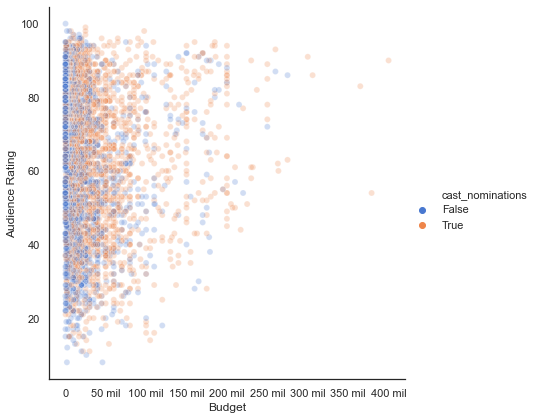

In [137]:
# Seaborn for scatter of Audience Rating vs Budget of Movie
sns.set(style="white")

splot = sns.relplot(x="budget", y="audience_rating", hue="cast_nominations",
            sizes=(40, 400), alpha=.25, palette="muted",
            height=6, data=oscars_pd, ax=ax1)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
x_tix = range(0,450000000,50000000)
x_tixlabels = ['0','50 mil', '100 mil', '150 mil', '200 mil', '250 mil', '300 mil', '350 mil', '400 mil']
splot.set(xlabel="Budget", ylabel="Audience Rating", xticks=x_tix, xticklabels= x_tixlabels)

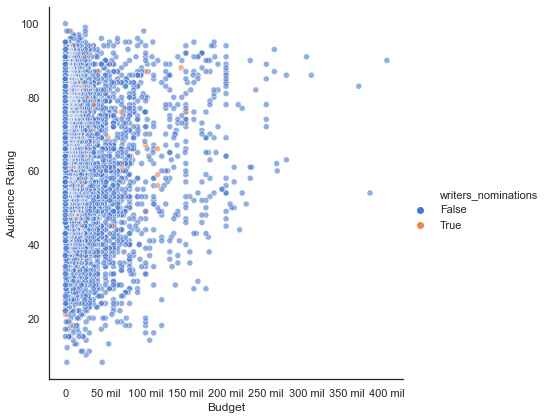

In [180]:
# Seaborn for scatter of Audience Rating vs Budget of Movie
sns.set(style="white")

splot = sns.relplot(x="budget", y="audience_rating", hue="writers_nominations",
            sizes=(40, 400), alpha=.6, palette="muted",
            height=6, data=oscars_pd, ax=ax1)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
x_tix = range(0,450000000,50000000)
x_tixlabels = ['0','50 mil', '100 mil', '150 mil', '200 mil', '250 mil', '300 mil', '350 mil', '400 mil']
splot.set(xlabel="Budget", ylabel="Audience Rating", xticks=x_tix, xticklabels= x_tixlabels)

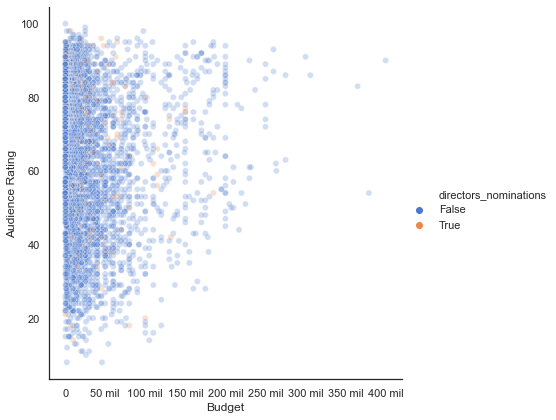

In [140]:
# Seaborn for scatter of Audience Rating vs Budget of Movie
sns.set(style="white")

splot = sns.relplot(x="budget", y="audience_rating", hue="directors_nominations",
            sizes=(40, 400), alpha=.25, palette="muted",
            height=6, data=oscars_pd, ax=ax1)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
x_tix = range(0,450000000,50000000)
x_tixlabels = ['0','50 mil', '100 mil', '150 mil', '200 mil', '250 mil', '300 mil', '350 mil', '400 mil']
splot.set(xlabel="Budget", ylabel="Audience Rating", xticks=x_tix, xticklabels= x_tixlabels)

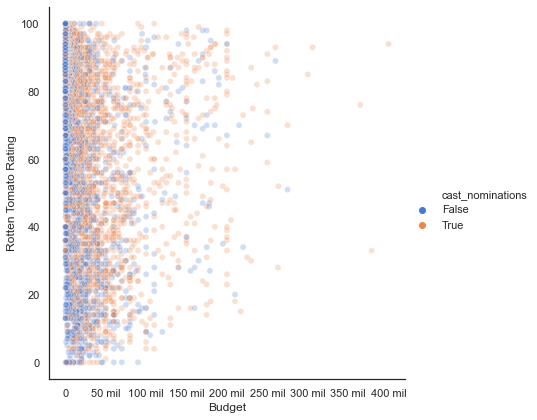

In [147]:
# Seaborn for scatter of Audience Rating vs Budget of Movie
sns.set(style="white")

splot = sns.relplot(x="budget", y="rotten_tomato_rating", hue="cast_nominations",
            sizes=(40, 400), alpha=.25, palette="muted",
            height=6, data=oscars_pd, ax=ax1)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
x_tix = range(0,450000000,50000000)
x_tixlabels = ['0','50 mil', '100 mil', '150 mil', '200 mil', '250 mil', '300 mil', '350 mil', '400 mil']
splot.set(xlabel="Budget", ylabel="Rotten Tomato Rating", xticks=x_tix, xticklabels= x_tixlabels)

TypeError: alpha must be a float or None

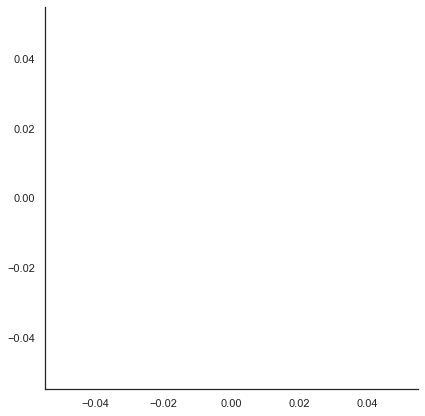

In [158]:
# Seaborn for scatter of Audience Rating vs Budget of Movie
sns.set(style="white")

alphas = [0.25, 0.9]

splot = sns.relplot(x="budget", y="rotten_tomato_rating", hue="writers_nominations",
            sizes=(40, 400), alpha=alphas, palette="muted",
            height=6, data=oscars_pd, ax=ax1)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
x_tix = range(0,450000000,50000000)
x_tixlabels = ['0','50 mil', '100 mil', '150 mil', '200 mil', '250 mil', '300 mil', '350 mil', '400 mil']
splot.set(xlabel="Budget", ylabel="Rotten Tomato Rating", xticks=x_tix, xticklabels= x_tixlabels)

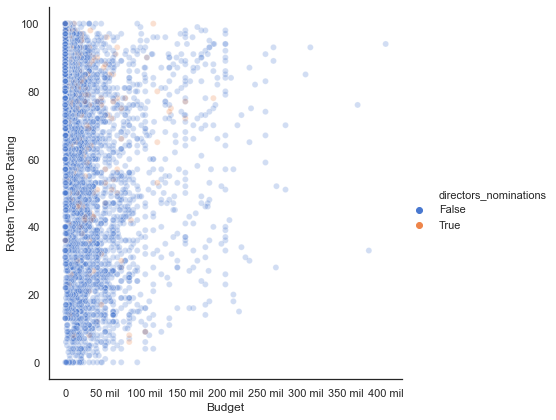

In [149]:
# Seaborn for scatter of Audience Rating vs Budget of Movie
sns.set(style="white")

splot = sns.relplot(x="budget", y="rotten_tomato_rating", hue="directors_nominations",
            sizes=(40, 400), alpha=.25, palette="muted",
            height=6, data=oscars_pd, ax=ax1)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
x_tix = range(0,450000000,50000000)
x_tixlabels = ['0','50 mil', '100 mil', '150 mil', '200 mil', '250 mil', '300 mil', '350 mil', '400 mil']
splot.set(xlabel="Budget", ylabel="Rotten Tomato Rating", xticks=x_tix, xticklabels= x_tixlabels)

In [168]:
oscars_pd['below_1mil'] = oscars_pd['budget'].values < 1_000_000
oscars_pd['below_5mil'] = oscars_pd['budget'].values < 5_000_000
oscars_pd['below_10mil'] = oscars_pd['budget'].values < 10_000_000
oscars_pd['below_100mil'] = oscars_pd['budget'].values < 100_000_000

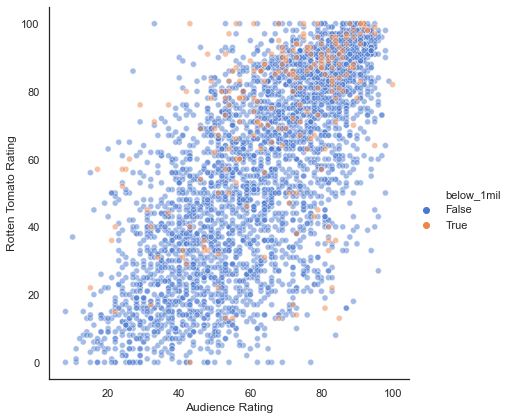

In [184]:
# Seaborn for scatter of Audience Rating vs Rotten Tomato ratings
sns.set(style="white")

splot = sns.relplot(x="audience_rating", y="rotten_tomato_rating", hue="below_1mil",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=oscars_pd, ax=ax1)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
# x_tix = range(0,450000000,50000000)
# x_tixlabels = ['0','50 mil', '100 mil', '150 mil', '200 mil', '250 mil', '300 mil', '350 mil', '400 mil']
splot.set(xlabel="Audience Rating", ylabel="Rotten Tomato Rating")

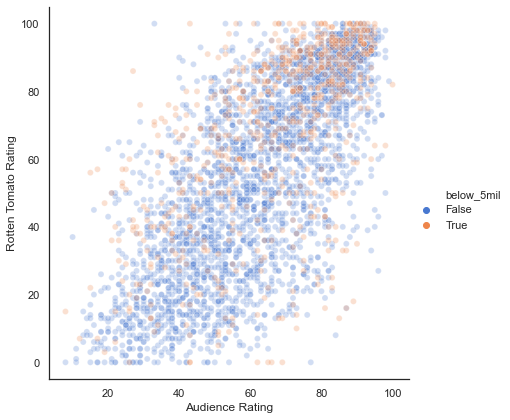

In [178]:
# Seaborn for scatter of Audience Rating vs Rotten Tomato ratings
sns.set(style="white")

splot = sns.relplot(x="audience_rating", y="rotten_tomato_rating", hue="below_5mil",
            sizes=(40, 400), alpha=.25, palette="muted",
            height=6, data=oscars_pd, ax=ax1)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
# x_tix = range(0,450000000,50000000)
# x_tixlabels = ['0','50 mil', '100 mil', '150 mil', '200 mil', '250 mil', '300 mil', '350 mil', '400 mil']
splot.set(xlabel="Audience Rating", ylabel="Rotten Tomato Rating")

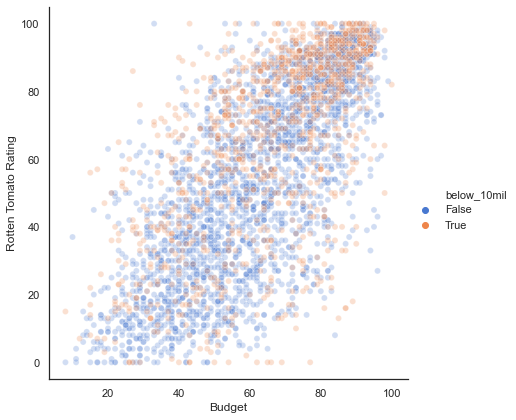

In [166]:
# Seaborn for scatter of Audience Rating vs Rotten Tomato ratings
sns.set(style="white")

splot = sns.relplot(x="audience_rating", y="rotten_tomato_rating", hue="below_10mil",
            sizes=(40, 400), alpha=.25, palette="muted",
            height=6, data=oscars_pd, ax=ax1)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
# x_tix = range(0,450000000,50000000)
# x_tixlabels = ['0','50 mil', '100 mil', '150 mil', '200 mil', '250 mil', '300 mil', '350 mil', '400 mil']
splot.set(xlabel="Budget", ylabel="Rotten Tomato Rating")

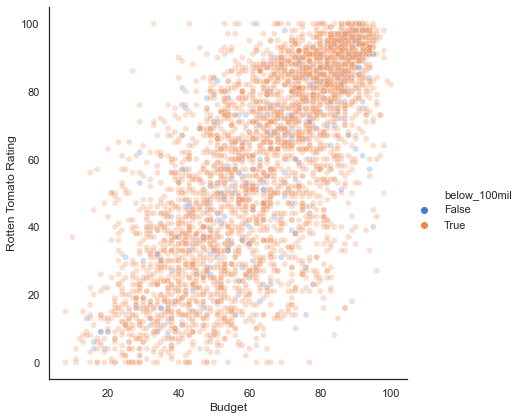

In [167]:
# Seaborn for scatter of Audience Rating vs Rotten Tomato ratings
sns.set(style="white")

splot = sns.relplot(x="audience_rating", y="rotten_tomato_rating", hue="below_100mil",
            sizes=(40, 400), alpha=.25, palette="muted",
            height=6, data=oscars_pd, ax=ax1)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
# x_tix = range(0,450000000,50000000)
# x_tixlabels = ['0','50 mil', '100 mil', '150 mil', '200 mil', '250 mil', '300 mil', '350 mil', '400 mil']
splot.set(xlabel="Budget", ylabel="Rotten Tomato Rating")

In [172]:
budget_tiers = []
for budget in oscars_pd.budget:
    if budget < 1_000_000:
        budget_tiers.append('< 1mil')
    elif budget < 10_000_000:
        budget_tiers.append('>= 1mil & < 10mil')
    elif budget < 100_000_000:
        budget_tiers.append('>= 10mil & < 100mil')
    else:
        budget_tiers.append('> 100mil')

['> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 100mil', '> 

In [173]:
oscars_pd['budget_tiers'] = budget_tiers

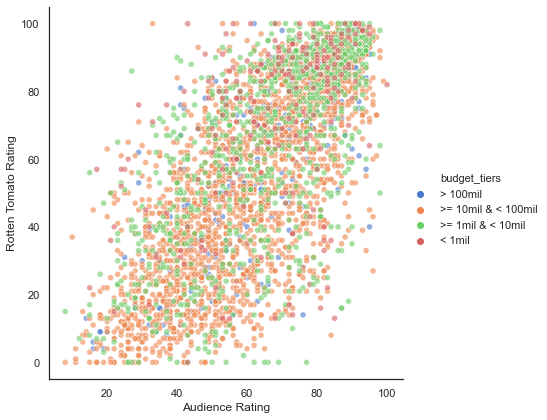

In [182]:
# Seaborn for scatter of Audience Rating vs Rotten Tomato ratings
sns.set(style="white")

splot = sns.relplot(x="audience_rating", y="rotten_tomato_rating", hue="budget_tiers",
            sizes=(40, 400), alpha=.6, palette="muted",
            height=6, data=oscars_pd, ax=ax1)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
# x_tix = range(0,450000000,50000000)
# x_tixlabels = ['0','50 mil', '100 mil', '150 mil', '200 mil', '250 mil', '300 mil', '350 mil', '400 mil']
splot.set(xlabel="Audience Rating", ylabel="Rotten Tomato Rating")